# Introduction to Image Processing FINAL PROJECT
# Beetle-Elephant-Tree Image Classification Using RANDOM FOREST
                                                                                             Created by ATA GÜRSEL-215060044

In [1]:
import cv2 # image processing library.
import numpy as np # library for numerical operations.
import os # library for interacting with the operating system.
from sklearn.model_selection import train_test_split # function for splitting the data into train and test sets.
from sklearn.preprocessing import StandardScaler # function for standardizing the features.
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix # These are the modules for evaluating the performance of the classifier, such as calculating the accuracy score and generating a confusion matrix.
from sklearn.ensemble import RandomForestClassifier # This module contains the RandomForestClassifier class for training and making predictions with a random forest ensemble model.
import matplotlib.pyplot as plt # This module is for creating plots and visualizations.
from matplotlib.image import imread # This module is for reading image files and converting them into arrays.

In [2]:
# define categories of images
Categories=['beetle','elephant','tree']

In [3]:
Categories

['beetle', 'elephant', 'tree']

In [4]:
# function to calculate circularity of an image
def calculate_circularity(image):
    # detect the contour of the object in the image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # calculate radius and cross-sectional area of the contour
    radius = cv2.minEnclosingCircle(contours[0])[1]
    area = cv2.contourArea(contours[0])
    # calculate circularity value
    return 4 * np.pi * area / (radius * radius)

In [5]:
# function to calculate convexity of an image
def calculate_convexity(image):
    # detect the contour of the object in the image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # calculate area and convex hull area of the object
    area = cv2.contourArea(contours[0])
    hull = cv2.convexHull(contours[0])
    hull_area = cv2.contourArea(hull)
    # check if the hull area is zero
    if hull_area == 0:
        return 0
    # calculate convexity value
    return area / hull_area

In [6]:
# function to calculate rectangularity of an image
def calculate_rectangularity(image):
    # detect the contour of the object in the image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # calculate area and area of the bounding rectangle of the object
    area = cv2.contourArea(contours[0])
    x,y,w,h = cv2.boundingRect(contours[0])
    rect_area = w * h
    # calculate rectangularity value
    rectangularity = area / rect_area
    return rectangularity

In [7]:
def calculate_euler_number(image):
    # Closing the image using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    # Opening the image using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)
    # Subtracting the opened image from the closed image
    euler_number = cv2.subtract(closed_image, opened_image)
    euler_number = cv2.countNonZero(euler_number)
    return euler_number

In [8]:
# read images and calculate circularity,rectangularity,euler and convexity features
X = [] # list to hold features
y = [] # list to hold classes

In [9]:
# read images in the dataset folder
path = os.path.join(os.getcwd(), 'dataset')
for category in Categories:
    # read images of the current category
    datadir = os.path.join(path, category)
    for img in os.listdir(datadir):
        # read image
        image = cv2.imread(os.path.join(datadir, img), cv2.IMREAD_GRAYSCALE)
        # calculate features of the image
        circularity = calculate_circularity(image)
        rectangularity = calculate_rectangularity(image)
        convexity = calculate_convexity(image)
        euler_number = calculate_euler_number(image)
        # add features and class to the lists
        X.append([circularity, rectangularity, convexity, euler_number])
        y.append(Categories.index(category))

In [10]:
#This code splits the data into training and testing sets, with the test set being 20% of the total data and the training set being 80% of the total data. The "random_state" parameter is used to ensure that the data is split in a reproducible way, and the "stratify" parameter ensures that the class distribution in the training and test sets is the same as the class distribution in the original data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)
print("Data split successfully")

Data split successfully


In [11]:
# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# make predictions
y_pred_rf = random_forest.predict(X_test)
print("Predicted labels (Random Forest):", y_pred_rf)

Predicted labels (Random Forest): [2 2 1 2 2 0 2 1 0 2 2]


In [14]:
print("Actual labels:", np.array(y_test))

Actual labels: [2 0 1 2 1 0 2 1 0 0 2]


In [15]:
# evaluate performance
print(classification_report(y_test, y_pred_rf, target_names=Categories))
print(f"Accuracy (Random Forest): {accuracy_score(y_pred_rf, y_test) * 100:.2f}%")
confusion_matrix(y_pred_rf, y_test)

              precision    recall  f1-score   support

      beetle       1.00      0.50      0.67         4
    elephant       1.00      0.67      0.80         3
        tree       0.57      1.00      0.73         4

    accuracy                           0.73        11
   macro avg       0.86      0.72      0.73        11
weighted avg       0.84      0.73      0.73        11

Accuracy (Random Forest): 72.73%


array([[2, 0, 0],
       [0, 2, 0],
       [2, 1, 4]], dtype=int64)

Prediction: beetle


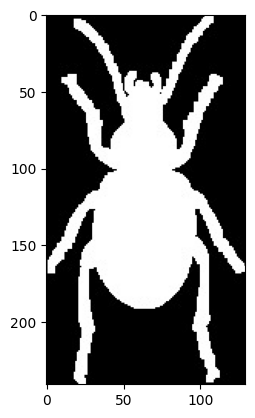

Circularity: 0.7853981902804831
Rectangularity: 0.9999997971840742
Convexity: True
Euler Number: 693


In [16]:
# classify a new image
path = os.path.join(os.getcwd(), 'test', 'beetle-11.jpg')
#This code reads an image located at "image_path" in grayscale format.
#And then calculates four different measurements of the shape of the object in the image.
#"circularity", "rectangularity", "convexity", and "euler_number"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
circularity = calculate_circularity(image)
rectangularity = calculate_rectangularity(image)
convexity = calculate_convexity(image)
euler_number = calculate_euler_number(image)
features = [circularity, rectangularity, convexity, euler_number]
# Scale the features and make prediction using classifier
scaled_features = scaler.transform([features])
prediction = random_forest.predict(scaled_features)[0]
# print the prediction
print('Prediction:', Categories[prediction])
# show the image
img = cv2.imread(path)
plt.imshow(img)
plt.show()

# Load the image and convert it to grayscale
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image to create a binary image
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find the contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over each outer contour
if len(contours) > 0:
    contour = contours[0]

    # Get the area and perimeter of the contour
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Get the convexity of the contour
    convex = cv2.isContourConvex(contour)

    # Get the circularity of the contour
    circularity = 4 * np.pi * area / (perimeter * perimeter)
    if circularity > 1:
        circularity = 1

    # Get the rectangularity of the contour
    rect = cv2.minAreaRect(contour)
    width, height = rect[1]
    if width > height:
        width, height = height, width
    rectangularity = width * height / area

    # Print the results
    print("Circularity:", circularity)
    print("Rectangularity:", rectangularity)
    print("Convexity:", convex)
    print("Euler Number:", euler_number)

Prediction: tree


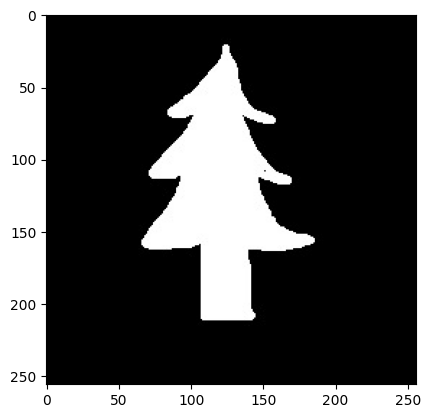

Circularity: 0.7853981902804831
Rectangularity: 0.9999997971840742
Convexity: True
Euler Number: 315


In [17]:
# classify a new image
path = os.path.join(os.getcwd(), 'test', 'tree-20.jpg')
#This code reads an image located at "image_path" in grayscale format.
#And then calculates four different measurements of the shape of the object in the image.
#"circularity", "rectangularity", "convexity", and "euler_number"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
circularity = calculate_circularity(image)
rectangularity = calculate_rectangularity(image)
convexity = calculate_convexity(image)
euler_number = calculate_euler_number(image)
features = [circularity, rectangularity, convexity, euler_number]
# Scale the features and make prediction using classifier
scaled_features = scaler.transform([features])
prediction = random_forest.predict(scaled_features)[0]
# print the prediction
print('Prediction:', Categories[prediction])
# show the image
img = cv2.imread(path)
plt.imshow(img)
plt.show()

# Load the image and convert it to grayscale
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image to create a binary image
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find the contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over each outer contour
if len(contours) > 0:
    contour = contours[0]

    # Get the area and perimeter of the contour
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Get the convexity of the contour
    convex = cv2.isContourConvex(contour)

    # Get the circularity of the contour
    circularity = 4 * np.pi * area / (perimeter * perimeter)
    if circularity > 1:
        circularity = 1

    # Get the rectangularity of the contour
    rect = cv2.minAreaRect(contour)
    width, height = rect[1]
    if width > height:
        width, height = height, width
    rectangularity = width * height / area

    # Print the results
    print("Circularity:", circularity)
    print("Rectangularity:", rectangularity)
    print("Convexity:", convex)
    print("Euler Number:", euler_number)

Prediction: elephant


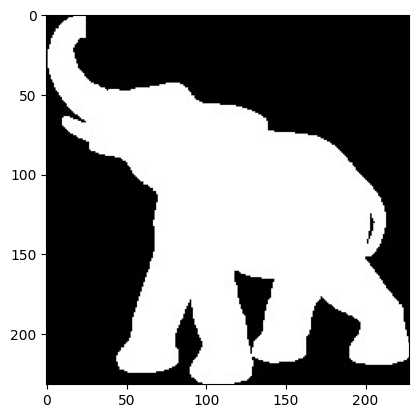

Circularity: 0.46562433699043726
Rectangularity: 1.8867477239685833
Convexity: False
Euler Number: 496


In [18]:
# classify a new image
path = os.path.join(os.getcwd(), 'test', 'elephant-19.jpg')
#This code reads an image located at "image_path" in grayscale format.
#And then calculates four different measurements of the shape of the object in the image.
#"circularity", "rectangularity", "convexity", and "euler_number"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
circularity = calculate_circularity(image)
rectangularity = calculate_rectangularity(image)
convexity = calculate_convexity(image)
euler_number = calculate_euler_number(image)
features = [circularity, rectangularity, convexity, euler_number]
# Scale the features and make prediction using classifier
scaled_features = scaler.transform([features])
prediction = random_forest.predict(scaled_features)[0]
# print the prediction
print('Prediction:', Categories[prediction])
# show the image
img = cv2.imread(path)
plt.imshow(img)
plt.show()

# Load the image and convert it to grayscale
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image to create a binary image
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find the contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over each outer contour
if len(contours) > 0:
    contour = contours[0]
    
    # Get the area and perimeter of the contour
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Get the convexity of the contour
    convex = cv2.isContourConvex(contour)

    # Get the circularity of the contour
    circularity = 4 * np.pi * area / (perimeter * perimeter)
    if circularity > 1:
        circularity = 1

    # Get the rectangularity of the contour
    rect = cv2.minAreaRect(contour)
    width, height = rect[1]
    if width > height:
        width, height = height, width
    rectangularity = width * height / area

    # Print the results
    print("Circularity:", circularity)
    print("Rectangularity:", rectangularity)
    print("Convexity:", convex)
    print("Euler Number:", euler_number)